# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



# Tuning hyper-parameters for precision

Best parameters set found on CV set:
LogisticRegression:  {'C': 0.1}
K-NN:  {'n_neighbors': 3}

0.956 (+/-0.032) for {'C': 0.03}
0.957 (+/-0.028) for {'C': 0.06}
0.957 (+/-0.029) for {'C': 0.1}
0.951 (+/-0.032) for {'C': 0.3}
0.948 (+/-0.031) for {'C': 0.6}
0.949 (+/-0.029) for {'C': 1.0}
0.949 (+/-0.031) for {'C': 2.0}
0.947 (+/-0.032) for {'C': 3.0}
0.947 (+/-0.031) for {'C': 4.0}
0.946 (+/-0.033) for {'C': 5.0}
0.977 (+/-0.039) for {'n_neighbors': 2}
0.978 (+/-0.038) for {'n_neighbors': 3}
0.972 (+/-0.042) for {'n_neighbors': 4}
0.973 (+/-0.037) for {'n_neighbors': 5}
0.972 (+/-0.036) for {'n_neighbors': 6}
0.972 (+/-0.035) for {'n_neighbors': 7}

A Detailed classification report for Logistic Regression on the Test set:

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        27
          1       0.79      0.84      0.81        31
          2       1.00      1.00      1.00        27
          3

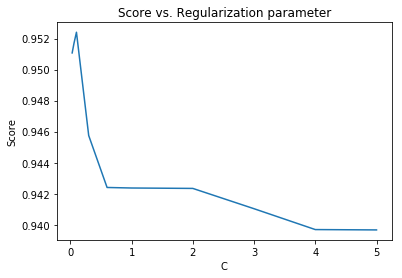

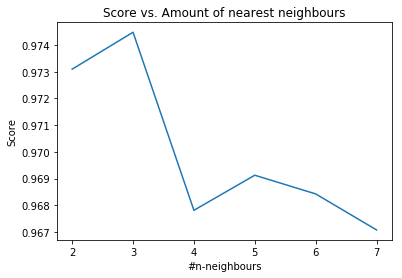

[[26  0  0  0  1  0  0  0  0]
 [ 0 26  0  2  0  0  0  0  3]
 [ 0  0 27  0  0  0  0  0  0]
 [ 0  1  0 19  0  3  0  2  5]
 [ 0  0  0  0 30  0  0  0  0]
 [ 0  1  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0 27  2]
 [ 0  2  0  0  0  0  0  0 26]]

[[27  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0]
 [ 0  0  1 26  0  1  0  1  1]
 [ 0  0  0  0 30  0  0  1  1]
 [ 0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0 30  0]
 [ 0  2  0  0  0  0  0  0 26]]


In [29]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scipy.stats as stats

# load mnist dataset and split in train and test set.
digits = load_digits()

X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]


#pre-processing data, it is necessary to normalize data to prevent bad behaviour of estimators
#due to individual features not adhering to a Gaussian distribution

stats.normaltest(X_train_mnist) #Use the normaltest() function to check if the data has a Normal distribution
                                #It turns out the data doesn't have a Normal dist. so we normalize the data
scaler = StandardScaler() 
scaler.fit(X_train_mnist)


# Set the parameters by cross-validation
tuned_parameters_logreg = [{'C':[0.03, 0.06, 0.1, 0.3, 0.6, 1.0, 2.0, 3.0, 4.0, 5.0]}]
tuned_parameters_knnreg = [{'n_neighbors': [2, 3, 4, 5, 6, 7]}]

scores = ['precision', 'recall']

for score in scores:
    print()
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    #Loading and Training Logistic Regression and K-NN
    logreg = GridSearchCV(LogisticRegression(), tuned_parameters_logreg, cv=10, scoring='%s_macro' % score)
    #Loading in
    logreg.fit(X_train_mnist, y_train_mnist) 
    #Training
    
    knnreg = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knnreg, cv=10, scoring='%s_macro' % score)
    knnreg.fit(X_train_mnist, y_train_mnist)
    
    print("Best parameters set found on CV set:")
    print("LogisticRegression: ", logreg.best_params_)
    print("K-NN: ", knnreg.best_params_)
    print()
    print("Grid scores on validation set")
    
    means_logreg = logreg.cv_results_['mean_test_score'] #Array of average validation scores on the CV sets
    stds_logreg = logreg.cv_results_['std_test_score'] #Array of Standard Deviations of the scores on the CV sets
    
    means_knnreg = knnreg.cv_results_['mean_test_score']
    stds_knnreg = knnreg.cv_results_['std_test_score']
    
    for mean, std, params in zip(means_logreg, stds_logreg, logreg.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    for mean, std, params in zip(means_knnreg, stds_knnreg, knnreg.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    print()
    print("A Detailed classification report for Logistic Regression on the Test set:")
    print()
    y_true, y_pred = y_test_mnist, logreg.predict(X_test_mnist) #Creates a classification report for LogReg then for K-NN
    print(classification_report(y_true, y_pred))
    print()
    print("A Detailed classification report for K-NN on the Test set:")
    print()
    y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
    print(classification_report(y_true, y_pred))


#Scores computed by LogisticRegression and K-NN on the CV set
scores_logreg = cross_val_score(logreg, X_train_mnist, y_train_mnist, cv=10)
scores_knnreg = cross_val_score(knnreg, X_train_mnist, y_train_mnist, cv=10)

#Plotting the Scores vs. the parameters that we are tuning
plt.plot(tuned_parameters_logreg[0]["C"], means_logreg)
plt.title('Score vs. Regularization parameter in the validation sets')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

plt.plot(tuned_parameters_knnreg[0]["n_neighbors"], means_knnreg)
plt.title('Score vs. Amount of nearest neighbours')
plt.xlabel('#n-neighbours')
plt.ylabel('Score')
plt.show()

#Creating a Confusion Matrix for Logistic Regression and K-NN
labels = array(range(9))

y_true, y_pred = y_test_mnist, logreg.predict(X_test_mnist)
cm_logreg = confusion_matrix(y_true, y_pred, labels=labels)

y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
cm_knnreg = confusion_matrix(y_true, y_pred, labels=labels)

print('Confusion matrix for Logistic Regression')
print(cm_logreg)
print()
print('Confusion matrix for K-NN')
print(cm_knnreg)

print()
print("Scores of the estimators, LogReg and KNN respectively, computed on the test set:")
y_true, y_pred = y_test_mnist, logreg.predict(X_test_mnist)
logreg_score = accuracy_score(y_true, y_pred)

y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
knn_score = accuracy_score(y_true, y_pred)
print(logreg_score, knn_score)

# Results and analysis of the experiment

## Discuss the results
For this assignment we used the built-in LogisticRegression and K-NN classifiers to predict the digits in the mnist dataset given an array of values (X). In order to estimate how well our model has been trained on the optimized parameters we used cross-validation. To be able to analyse the results of the classifiers we had to produce a classification report which states the precision, recall, and f1-score. 

The F1-score is a combined measure that assesses the trade-off between Precision and Recall. The way the F1-score is calculated is beyond the scope of this analysis. 

For Logistic Regression there seems to be a steady decrease in Score as the regularization parameter C increases. It is important to note that a lower C value indicates stronger regularization. So in our case stronger regularization was deemed necessary to best fit the data. The optimal C value turned out to be 0.1, this seemingly arbitrary number was chosen because it was in our list of discrete tuned parameters. Had we chosen to go for a list of continuous tuned parameters the optimal value of our C value might have changed slightly. It is also important to note that in this case we only optimized the regularization parameter. This might have had an effect on the accuracy of the predictions of Logistic Regression.
As for the classification reports of Logistic Regression, we see that the precision and recall for some individual digits is much lower compared to others. However, averaging over the whole dataset the precision and recall is pretty high, due to certain digits having perfect precision and recall. These cases of perfect precision and recall bring up the average, but aren't representative of the individual predictions. 

Statistically, the K-NN classifier has a higher chance of predicting the correct value, a score of 0.892 vs 0.959. This is backed up by the fact that the precision and recall values are a lot higher. It can also be seen in the confusion matrices of the two classifiers, Logistic regression missclassifies numbers more often than K-NN does. 

Conclusion, the K-NN classifier is the better option to predict the digits of the mnist dataset in this case, however, if we tuned more parameters of the Logistic Regression classifier the chances are that the score of that particular classifier would go up. 




## Testing

In [30]:

cross_val_score(logreg, X_test_mnist, y_test_mnist, cv=10)

array([ 0.90833333,  0.9       ,  0.9       ,  0.9       ,  0.86666667,
        0.9       ,  0.96666667,  0.93333333,  0.95      ,  1.        ])

In [5]:
scores_logreg

array([ 0.90833333,  0.9       ,  0.9       ,  0.9       ,  0.86666667,
        0.9       ,  0.96666667,  0.93333333,  0.95      ,  1.        ])

In [6]:
knnreg.cv_results_

{'mean_fit_time': array([ 0.00275254,  0.00290489,  0.0029541 ,  0.00285683,  0.00295277,
         0.00285354]),
 'mean_score_time': array([ 0.0166189 ,  0.01711633,  0.01776819,  0.01776195,  0.01761594,
         0.01781533]),
 'mean_test_score': array([ 0.97309468,  0.97447575,  0.9678152 ,  0.9691277 ,  0.96842802,
         0.96708135]),
 'mean_train_score': array([ 0.99138678,  0.99379671,  0.99245169,  0.99143622,  0.99090406,
         0.99045784]),
 'param_n_neighbors': masked_array(data = [2 3 4 5 6 7],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7}),
 'rank_test_score': array([2, 1, 5, 3, 4, 6]),
 'split0_test_score': array([ 0.92083333,  0.92708333,  0.91458333,  0.92083333,  0.92083333,
         0.91416667]),
 'split0_train_score': array([ 0.99399567,  0.99476926,  0.99327672,  0.99180605,  0.9910482

In [7]:
acc_knnreg

NameError: name 'acc_knnreg' is not defined

In [ ]:
logreg.best_params_

In [ ]:
tuned_parameters_logreg[0]["C"]


In [ ]:
X_train_mnist[1]



In [ ]:
tuned_parameters_logreg[0]["C"]


In [8]:
means_logreg

array([ 0.9510754 ,  0.9517046 ,  0.95240937,  0.9457502 ,  0.94240163,
        0.94236746,  0.94234079,  0.94103159,  0.93968746,  0.93966524])

In [28]:
from sklearn.metrics import confusion_matrix

labels = array(range(9))

y_true, y_pred = y_test_mnist, logreg.predict(X_test_mnist)
cm_logreg = confusion_matrix(y_true, y_pred, labels=labels)

y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
cm_knnreg = confusion_matrix(y_true, y_pred, labels=labels)

print(cm_logreg)
print()
print(cm_knnreg)

[[26  0  0  0  1  0  0  0  0]
 [ 0 26  0  2  0  0  0  0  3]
 [ 0  0 27  0  0  0  0  0  0]
 [ 0  1  0 19  0  3  0  2  5]
 [ 0  0  0  0 30  0  0  0  0]
 [ 0  1  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0 27  2]
 [ 0  2  0  0  0  0  0  0 26]]

[[27  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0]
 [ 0  0  1 26  0  1  0  1  1]
 [ 0  0  0  0 30  0  0  1  1]
 [ 0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0 30  0]
 [ 0  2  0  0  0  0  0  0 26]]


In [16]:
y_test_mnist

array([1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1,
       7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0,
       0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5,
       0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8,
       4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
       7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [23]:
a = array(range(9))
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [34]:
from sklearn.metrics import accuracy_score

y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
accuracy_score(y_true, y_pred)

0.95959595959595956